In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('q1.csv')
x=df['x'].values
y=df['y'].values
b0 = 0
b1 = 0
alpha = 0.01
epochs = 4
errors = []

for _ in range(epochs):
    for i in range(y.shape[0]):
        y_pred = b0 + b1 * x[i]
        error = y_pred - y[i]
        b0 -= alpha * error
        b1 -= alpha * error * x[i]
    
        errors.append(error**2) 

print(b0,b1)

0.2907490465662177 0.8006764099476639


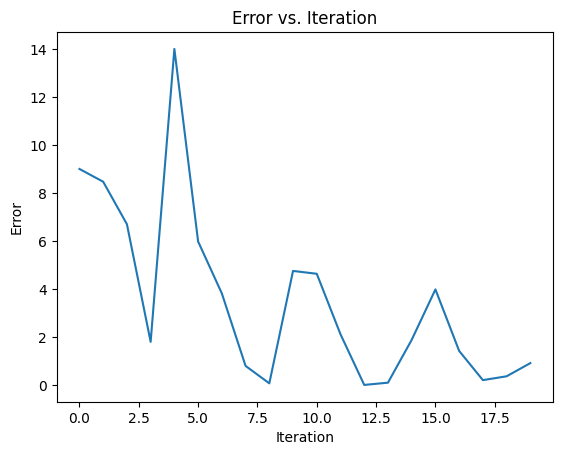

In [8]:
plt.plot(range(20), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.show()

In [19]:

data = {
    'salary': [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2],
    'experience': [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
}

df = pd.DataFrame(data)

csv_file = 'salary.csv'
df.to_csv(csv_file, index=False)
df

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4
5,4.2,2.5
6,4.4,2.8
7,6.1,3.1
8,5.4,3.3
9,5.7,3.7


In [10]:
X=df['experience'].values
Y=df['salary'].values

In [11]:

def calc_errors(y_pred,y):
    mse=np.mean((y-y_pred)**2)
    return mse

In [12]:
slopes=[0.1,0.8,1.5]
b=1.1
errors=[]

for beta in slopes:
    y_pred=[beta*x + b for x in X]
    error=calc_errors(y_pred,Y)
    errors.append(error)
    
errors

[10.81115, 1.762599999999999, 1.1404166666666662]

In [13]:
beta=0
b=1.1
errors=[]
slopes=[]

while beta<=1.5:
    y_pred=[beta*x + b for x in X]
    error=calc_errors(y_pred,Y)
    errors.append(error)
    slopes.append(beta)
    beta+=0.01

In [14]:
beta=1.2
b=0
errors=[]
intercepts=[]
while b<=1.5:
    y_pred=[beta*x + b for x in X]
    error=calc_errors(y_pred,Y)
    errors.append(error)
    intercepts.append(b)
    b+=0.01

In [20]:

df['salary'] = df['salary'].apply(lambda x: 1 if x > 4 else 0)
df

,salary,experience
0,0,1.2
1,0,1.5
2,0,1.9
3,0,2.2
4,0,2.4
5,1,2.5
6,1,2.8
7,1,3.1
8,1,3.3
9,1,3.7


In [22]:
def calc_loss(y_pred,y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [28]:
X=df['experience'].values
Y=df['salary'].values
losses=[]
def logistic_regression(X,Y,epochs,alpha,b1,b0):
    for _ in range(epochs):
        for x,y in zip(X,Y):
            z=b1*x + b0
            y_pred=1/(1+np.exp(-z))
            error=y_pred-y
            b1-=(alpha*error*x)
            b0-=(alpha*error)
        losses.append(calc_loss(y_pred,y))
    
    return b1,b0

In [31]:
b1,b0 = logistic_regression(X,Y,500,0.01,0,0)
y_probs=[1/(1+np.exp(-(b1*x+b0))) for x in X]
y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

print(y_binary)

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
